## 06-04 자동 미분과 선형 회귀 실습

### 자동 미분

In [1]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 활용한 선형회귀 구현

In [6]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

# 가설을 함수로서 정의
@tf.function
def hypothesis(x):
  return w*x + b

@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] 

optimizer = tf.optimizers.SGD(0.01)

# 300번에 걸쳐 경사 하강법 수행
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}" .format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [7]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### 케라스로 구현하는 선형회귀

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] 
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

# 모델 생성
model = Sequential() 

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 4684.8608 - mse: 4684.8608
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 577.5796 - mse: 577.5796
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 72.2078 - mse: 72.2078
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 10.0238 - mse: 10.0238
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 2.3709 - mse: 2.3709
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 1.4275 - mse: 1.4275
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3098 - mse: 1.3098
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2936 - mse: 1.2936
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2900 - mse: 1.2900
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 1.2879 - mse: 1.2879
Epoch 11/300
1/1 [==============================] - 0s 14ms

1/1 [==============================] - 0s 192ms/step


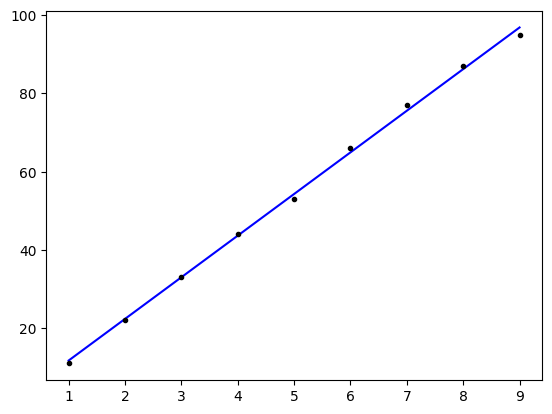

In [10]:
#  최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.
import matplotlib.pyplot as plt

plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [11]:
# 이 직선을 통해 x=9.5일 때의 시험 성적을 예측하게 해봅시다.
print(model.predict([9.5]))

1/1 [==============================] - 0s 75ms/step
[[102.13709]]
